In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
blog_data=pd.read_csv("blogtext.csv")

In [3]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data.date = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.sample(20)

(611652, 7)


,id,gender,age,topic,sign,date,text
73533,1570719,male,26,Education,Libra,2004-08-01,"urlLink Ba'al Shem , rakab arpat..."
406496,1204495,male,17,Student,Leo,2003-11-26,Dannys new chat up line: 'do you fancy ...
581143,2021701,male,17,Engineering,Libra,2004-07-19,"Hey guys, check out urlLink..."
308061,1395849,female,23,Non-Profit,Leo,2004-04-17,Final Final Exams I've started study...
390897,3657764,male,24,indUnk,Virgo,2004-07-14,I spent the Fourth of July in Pacific B...
480599,585884,male,17,indUnk,Sagittarius,2004-08-02,"Snatch , the latest flick from British..."
636564,918312,female,27,Communications-Media,Scorpio,2003-11-24,TWAS THE NIGHT BEFORE CHRISTM...
654522,3510796,female,25,Student,Taurus,2004-07-15,I just got done posting the set list (f...
628133,4141104,male,17,indUnk,Pisces,2004-08-04,"Hey all its me Ben vilyus, I have creat..."
125108,3801868,male,26,Biotech,Cancer,2004-08-07,Now I don't want to seem to be harping ...


In [4]:
####################################################################################################
#####                            Sampling for code develpoment 
#####                            Remove after validating code
####################################################################################################

# blog_data=blog_data.sample(frac=.022)

# print("******WARNING****** \n DATASET SAMPLED!!!!!!")
# print(blog_data.shape)

# Word Embeddings

In [6]:
tfidf_transformer = TfidfVectorizer(stop_words="english",max_features=1500 )
n_grams_tfidf = tfidf_transformer.fit_transform(blog_data["text"])
n_grams_tfidf.shape

(611652, 1500)

In [7]:
aaamamamamamama

NameError: name 'aaamamamamamama' is not defined

In [ ]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_tfidf,markersize=.5, marker="o",aspect='auto')
# plt.title("TF-IDF matrix")

In [8]:
top_n=100
txt_info= n_grams_tfidf.toarray().sum(axis=0)
indices = np.argsort(txt_info)[::-1]
features =tfidf_transformer.get_feature_names()
top_features = np.array([[features[i],float(txt_info[i])] for i in indices[:top_n]])
pd.DataFrame({"word":top_features[:,0],"info":top_features[:,1]})[:20]

,word,info
0,urllink,43783.51167763518
1,nbsp,23686.154100814274
2,just,22436.778663992667
3,like,21841.126117258482
4,know,16217.039445281507
5,time,15869.613385935496
6,really,15468.966019312591
7,don,15293.445983106429
8,think,14142.556515838904
9,good,14054.918775155427


Text(0.5,1,'Term info sorted')

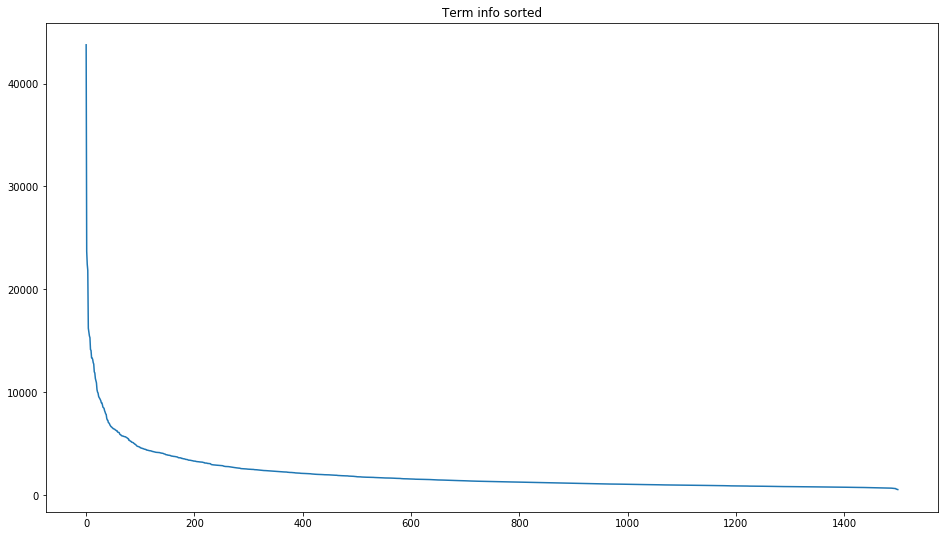

In [9]:
plt.figure(figsize=(16,9))
plt.plot(txt_info[indices])#[indices[:top_n]]
plt.title("Term info sorted")

In [ ]:
# n_grams_count_top=n_grams_tfidf.toarray()[:,indices[:top_n]]

In [ ]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_count_top,markersize=.5,aspect='auto', marker="o")
# plt.title("Top term info matrix")

In [12]:
# text_ward_full=hierarchy.linkage(n_grams_count_top, 'ward')#(n_grams_tfidf.toarray(),"ward")#
text_ward_full=hierarchy.linkage(n_grams_tfidf.toarray(),"ward")

MemoryError: 

In [11]:
plt.figure(figsize=(15,35))
dn_tf_full = hierarchy.dendrogram(text_ward_full,orientation="left")
plt.title('Ward Link Dendrogram from top embedding')
plt.show()



NameError: name 'text_ward_full' is not defined

<Figure size 1080x2520 with 0 Axes>

# Clusters por edad y tópico